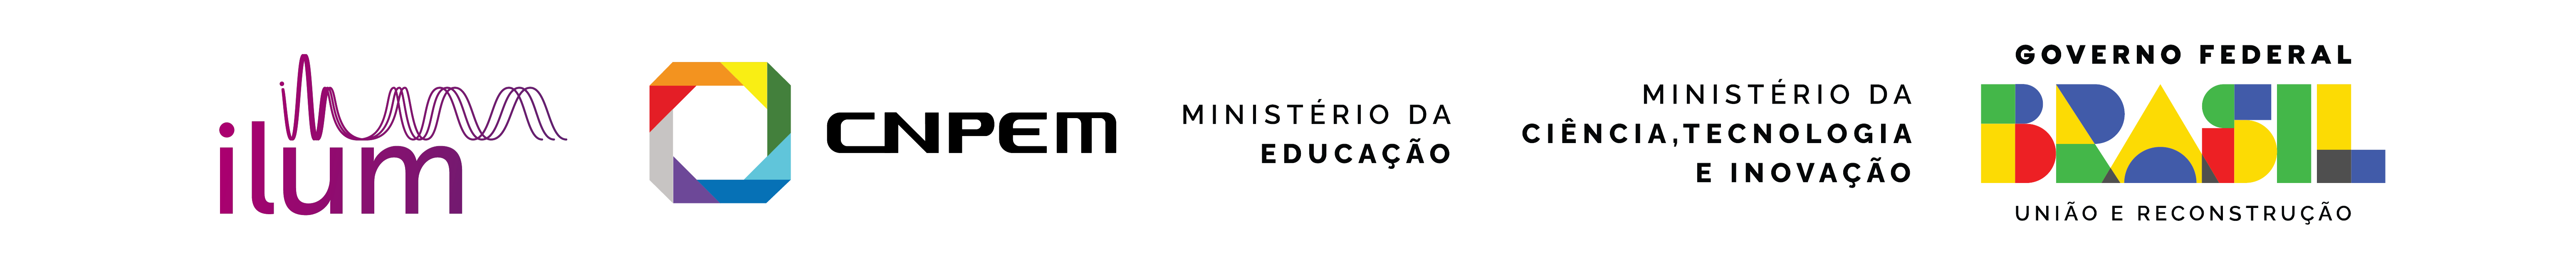

## <center> PREVISÃO DO TEMPO DE SÍNTESE DE MOF's <br><br> Relatório 📝</center>

Projeto final da disciplina `Aprendizado de Máquina` do 2° período do Bacharelado em `Ciência e Tecnologia` da *Ilum Escola de Ciência (Centro Nacional de Pesquisa em Energia e Materiais)*.

<b> Professor: </b> Daniel Cassar<br>
<b> Semestre: </b> 2024.2 <br>
<b> Turma: </b> 2024 <br>
<b> Grupo: </b> 6 - Arautos da Crepúsculo <br>
<b> Integrantes: </b> Feérica Lyra (*Letícia Nunes*), Mística Luz (*Rafaela Luz*) e Druida Thomaleq (*Thomas Hannemann*) <br>

---

### Sumário

1. Resumo <br>
2. Introdução <br>
3. Metodologia <br>
    3.1. Tratamento dos dados e seleção de atributos <br>
    3.2. Modelos testados e métricas <br>
4. Resultados <br>
5. Conclusão <br>
6. Agradecimentos <br>
7. Referências <br>

---

## 1. Resumo

Assim como para as demais práticas realizadas em um laboratório, o planejamento do experimento é uma etapa essencial para a otimização do processo e dos custos$^{[3]}$. Sabendo o tempo que o material leva para ser sintetizado ou o controlando a partir da alteração das demais variáveis (como temperatura e aditivos) é possível administrar melhor as demais atividades que devem ser realizadas no laboratório.

As redes metalorgânicas (MOF, do inglês *Metal Organic Framework*), são uma classe de materiais porosos constituídos de compostos de coordenação que apresentam diversas características relevantes como alta porosidade, elevada área superficial e flexibilidade, além de possuírem uma extensa gama de aplicações como podendo serem utilizados como adsorventes, catalisadores, peneiras moleculares e para a obtenção de imagens biomédicas $^{[1,2]}$.

Tendo as informações apresentadas acima e as diversas ferramentas aprendidas ao longo dos dois primeiros meses da disciplina de Aprendizado de Máquina em vista, decidimos desenvolver um modelo de aprendizado de máquina supervisionado que prevê o tempo da síntese de um MOF. Ao longo do projeto, fizemos seleção de atributos e treinamos três modelos com diferentes métodos e algoritmos e otimizamos os hiperparâmetros em busca de um modelo que melhor predizesse o nosso target.

O melhor resultado foi com o regressor 𝑘-NN, sem otimização de hiperparâmetros e com seleção de atributos por VIF. As métricas para os seis modelos mais robustos foram muito similares e próximas da do baseline, o que permitiu concluir que os modelos não ficaram bons.

---

## 2. Introdução

O aprendizado supervisionado é a área de aprendizado de máquina na qual os algoritmos induzem modelos preditivos que recebem um ou mais atributos (ou *features*) e retornam a previsão de um ou mais alvos (ou *targets*)$^{[4]}$. Dado um modelo cujo target é uma variável numérica, temos um problema de regressão e, para resolvê-lo, temos alguns algoritmos clássicos, como: regressão linear, k vizinhos mais próximos (k-NN), árvore de decisão e floresta aleatória.

Nesse projeto, desenvolvemos um modelo supervisionado que recebe algumas características do MOF sendo sintetizado e prevê o tempo de síntese.

Ademais, alguns algoritmos requerem que os dados estejam normalizados (e.g. k-NN) e outros precisam que o número de atributos seja reduzido para evitar um *overfitting* (e.g. árvore de decisão), processos que foram explorados e realizados ao longo do projeto. Por fim, para escolher o melhor modelo para o conjunto de dados sendo estudado, o desempenho dele pode ser avaliado a partir das métricas de performance.

---

## 3. Metodologia

Para escrevermos o trabalho e realizarmos as etapas que serão descritas a seguir, utilizamos:

**Linguagens de programação:** Python

**Linguagens de marcação:** LaTeX e html

**Software:** Jupyter Notebook.

**Bibliotecas:** Scikit-learn, Pandas e Optuna.

**DataSet:** `RAC_train.csv` do <i> Metal-Organic Frame Materials Prediction </i> disponível no link do [Kaggle](https://www.kaggle.com/datasets/marquis03/metal-organic-frame-materials-prediction/data).

### 3.1 Tratamento e seleção dos dados

No `Caderno 1`, fazemos o split de treino e teste dos dados. Como o arquivo `RAC_test.csv` disponível na plataforma [Kaggle](https://www.kaggle.com/datasets/marquis03/metal-organic-frame-materials-prediction/data) não possui algumas colunas como a que vamos usar como target (`time`), precisamos usar apenas o dataset `RAC_train.csv` e separá-lo em dados para treino e teste dos nossos futuros modelos. Além disso, o dataset original também não definiu a unidade de medida do tempo, mas depois de conversar com a especialista Prof. Dra. Valéria Marangoni, foi possível concluir que ele está em horas, pois sínteses de metalorgânicos comumente duram por um período de dias e os valores observados no dataset são, em sua maioria, múltiplos de 24.

No `Caderno 2`, realizamos a seleção de atributos, passo de extrema relevância para nosso trabalho dado que temos um dataframe com cerca de 350 colunas. Testamos diferentes métodos, incluindo: pré-seleções por limiar da variância (principal) e conversa com especialista, seleções por remoção recursiva de atributos (`RFE`) e fator de inflação da variância (`VIF`) e treinamento de um modelo linear múltiplo Lasso. Observamos o score $R^2$ em cada seleção e escolhemos três seleções principais para os três modelos a serem futuramente testados. Essas seleções foram:

* VIF com limiar `VIF = 5` para a regressão $k$-NN,
* RFE com 10 atributos para árvore de decisão e
* RFE com 10 atributos para floresta aleatória.

### 3.2 Modelos testados e parâmetros analisados

Para selecionarmos o modelo ideal para o nosso dataset, no `Caderno 3.0` calculamos o RMSE (raiz do erro quadrático médio) do modelo baseline para usarmos como referência para avaliar a qualidade dos modelos usando algoritmos de **Regressão $k$-NN** (`3.1`), **Árvore de Decisão** (`3.2`) e **Floresta Aleatória** (`3.3`). Ademais, também avaliamos a melhora das performances com a otimização de hiperparâmetros.

No `Caderno 4`, avaliamos todas as métricas obtidas e o de melhor performance foi escolhido como modelo final. No `Caderno 5` reproduzimos do início ao fim, de forma concisa, o modelo final.

---

## 4. Resultados

Abaixo, temos o gráfico de RMSE por modelo treinado.


Como podemos observar no gráfico acima, o modelo final com melhor performance foi o **regressor $k$-NN** sem otimização de hiperparâmetros e com seleção de atributos por **VIF** (limiar de VIF = 5), caso em que o RMSE foi igual a **59,9279 horas**. Consideramos que não foi um bom resultado, com métrica bastante próxima à da baseline e representando um intervalo de quase 3 dias para um target em horas, cujos dados são quantidades pequenas de dias. Houve um modelo - **árvore de decisão** sem otimização de hiperparâmetros - que apresentou RMSE maior que o da baseline, o que caracteriza um modelo muito ruim. Para um deselvolvimento mais aprofundado da comparação entre modelos, consulte o caderno 4. Para ver o modelo final em funcionamento, consulte o caderno 5.

---

## 5. Conclusão

Embora a melhor performance alcançada dentre os modelos treinados não tenha sido a ideal mesmo após todos os testes e otimizações, tivemos a oportunidade de colocar em prática diversos conceitos aprendidos na disciplina de Aprendizado de Máquina e explorar um pouco além do que foi visto em sala de aula. Ademais, também foi possível desenvolver maior sensibilidade para escolhas que precisam ser tomadas de forma parcialmente arbitrária como, por exemplo, o espaço de busca da otimização de hiperparâmetros e os métodos de escolha de atributos.

---

## 6. Agradecimentos

Agrademos ao professor Daniel Cassar por nos instruir com tamanho bom humor e pela paciência para tirar nossas dúvidas constantes. Agradecemos também à professora Valéria Spolon pelos esclarecimentos acerca da síntese dos materais organo-metálicos.

---

## 7. Referências

<b>1. Metal Organic Framework (MOF): </b> https://www2.ufjf.br/gfqsi/linhas-de-pesquisa-old/materiais-nanoporosos/metal-organic-framework-mof/ <br>
<b>2. MOFs: Uma fascinante classe de materiais inorgânicos porosos:</b> https://www.scielo.br/j/qn/a/khcLbFfnzhvVhh9NdkVJFby/ <br>
<b>3. Otimização do tempo no laboratório: </b> https://anais.unicentro.br/concisa/iiiconcisa/pdf/resumo_70.pdf <br>
<b>4. Aprendizado de Máquina: </b> Notebook didático do professor Daniel Cassar: ATP-203 2.1 - Aprendizado de máquina, k-NN e métricas <br>
<b>5. Normalização: </b> Notebook didático do professor Daniel Cassar: ATP-203 1.1 - Tratamento de dados <br>
<b>6. Seleção de Atributos: </b> Notebook didático do professor Daniel Cassar: ATP-203 7.1 - Seleção de atributos <br>
<b>7. Dataset original: </b> https://www.kaggle.com/datasets/marquis03/metal-organic-frame-materials-prediction/data <br>